In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/peruvian-food-reviews/preprocessed_text.csv
/kaggle/input/peruvian-food-reviews/data/data/restaurants.csv
/kaggle/input/peruvian-food-reviews/data/data/model.csv
/kaggle/input/peruvian-food-reviews/data/data/reviews.csv
/kaggle/input/peruvian-food-reviews/data/data/spanish-nrc/lexico_nrc.csv
/kaggle/input/peruvian-food-reviews/data/data/spanish-nrc/lexico_afinn.csv
/kaggle/input/peruvian-food-reviews/data/data/geospatial/districts.dbf
/kaggle/input/peruvian-food-reviews/data/data/geospatial/districts.prj
/kaggle/input/peruvian-food-reviews/data/data/geospatial/districts.xml
/kaggle/input/peruvian-food-reviews/data/data/geospatial/districts.shp
/kaggle/input/peruvian-food-reviews/data/data/geospatial/districts.cpg
/kaggle/input/peruvian-food-reviews/data/data/geospatial/districts.shx


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/peruvian-food-reviews/preprocessed_text.csv')
df.head()

,id_review,pre_review
0,R1245,presentacion servicio exageradamente costoso i...
1,R1246,presentacion plato calidad alimento vino exper...
2,R1247,reencontrame amigo querido peru visitar stater...
3,R1248,excelente experiencia comer maravilloso excele...
4,R1249,pasion viajar disfrutar grandeza pais sobretod...


In [4]:
df.columns

Index(['id_review', 'pre_review'], dtype='object')

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all reviews into one string
text = ' '.join(df['pre_review'].dropna())

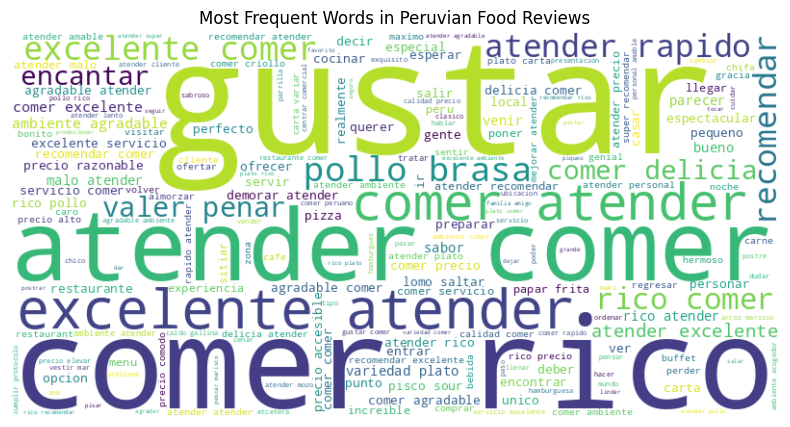

In [6]:
# Create a word cloud
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Peruvian Food Reviews")
plt.show()

In [7]:
import numpy as np

# Create random binary sentiment labels (0 = Negative, 1 = Positive)
df['label'] = np.random.randint(0, 2, df.shape[0])
df.head()

,id_review,pre_review,label
0,R1245,presentacion servicio exageradamente costoso i...,0
1,R1246,presentacion plato calidad alimento vino exper...,0
2,R1247,reencontrame amigo querido peru visitar stater...,0
3,R1248,excelente experiencia comer maravilloso excele...,0
4,R1249,pasion viajar disfrutar grandeza pais sobretod...,0


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['pre_review'].fillna(''))

# Labels
y = df['label']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Predict
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50     51631
           1       0.50      0.52      0.51     51627

    accuracy                           0.50    103258
   macro avg       0.50      0.50      0.50    103258
weighted avg       0.50      0.50      0.50    103258



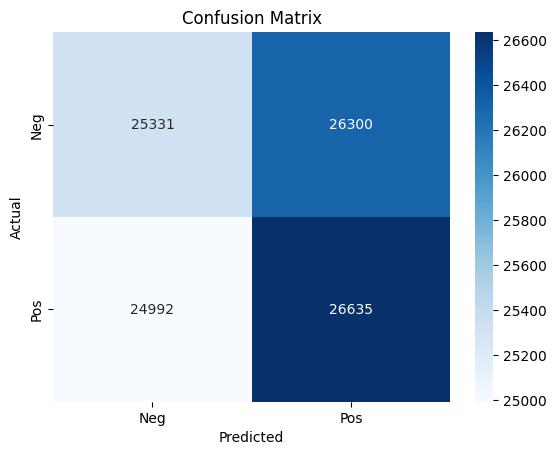

In [12]:
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()